# House Price Prediction: Data Analysis and Model Pipeline

This notebook explores the **House Price Dataset of India** to predict house prices based on various features like **number of bedrooms**, **living area**, **location**, and more. The project involves several steps:

1. **Data Exploration**: Visualizing the distribution of features and examining their correlation with the target variable (`Price`).
2. **Feature Selection and Preprocessing**: Selecting relevant features for the model and preparing the data for training.
3. **Model Building**: Training a baseline **XGBoost regressor** model to predict house prices and evaluating its performance.
4. **Error Analysis**: Identifying and analyzing errors in predictions to understand the model's weaknesses and guide future improvements.

The goal is to provide insights into which features most influence house prices and assess the performance of the baseline model.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [29]:
# Load the dataset from the local CSV file
df = pd.read_csv('House Price India.csv')

# Show first few rows of the dataset
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [30]:
# Get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [31]:
# Check for missing values
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

Looks good, no null/empty values!

### **Dataset Explanation**

The dataset consists of **14,619 entries** and **23 columns**, containing information about houses in a particular region. The columns represent various features of the houses, such as their size, location, number of rooms, condition, and more. Below is a brief explanation of each feature:

1. **ID**: A unique identifier for each house.
2. **Date**: The date of the listing or sale in an integer format.
3. **Number of Bedrooms**: The number of bedrooms in the house.
4. **Number of Bathrooms**: The number of bathrooms in the house, which is a float to account for half-baths.
5. **Living Area**: The area of the house (living space), measured in square feet.
6. **Lot Area**: The total area of the land the house sits on, measured in square feet.
7. **Number of Floors**: The number of floors in the house.
8. **Waterfront Present**: A binary indicator (0 or 1) denoting whether the house is located on the waterfront.
9. **Number of Views**: The number of views the house has, which may represent the view quality or quantity from the property.
10. **Condition of the House**: A numeric scale representing the condition of the house, likely a rating system (e.g., 1 to 5).
11. **Grade of the House**: A numeric value indicating the overall quality of the house, such as construction and finishing grade.
12. **Area of the House (Excluding Basement)**: The total living area of the house excluding the basement.
13. **Area of the Basement**: The size of the basement area.
14. **Built Year**: The year the house was built.
15. **Renovation Year**: The year when the house was last renovated, if applicable.
16. **Postal Code**: The postal code of the house's location.
17. **Latitude**: The latitude coordinate of the house's location.
18. **Longitude**: The longitude coordinate of the house's location.
19. **Living Area (Renovated)**: The renovated living area of the house, if applicable.
20. **Lot Area (Renovated)**: The renovated lot area, if applicable.
21. **Number of Schools Nearby**: The number of schools located near the house.
22. **Distance from the Airport**: The distance of the house from the nearest airport.
23. **Price**: The target variable representing the price of the house in dollars.

### **Target Variable: Price**

The **target variable** for this dataset is **Price**. It represents the sale price of the house in USD and is the variable we aim to predict using the other features in the dataset. The goal is to understand how different factors (e.g., living area, number of bedrooms, house grade, and location) influence the price of a house. 

The dataset is well-structured, with no missing values across any columns, making it ready for analysis and model building. The features vary in their type, including numerical and categorical values, allowing us to perform both exploratory data analysis (EDA) and build machine learning models to predict house prices.

Visualization 1: Correlation Heatmap
Explanation:
This heatmap will show the correlations between all numerical features in the dataset, with a focus on how they correlate with Price. Features that are highly correlated with Price will stand out, helping us identify key predictors for our model.
By visualizing the correlation matrix, we can also identify potential multicollinearity between features (i.e., when two or more features are highly correlated with each other). This is important because highly correlated features may provide redundant information to the model.

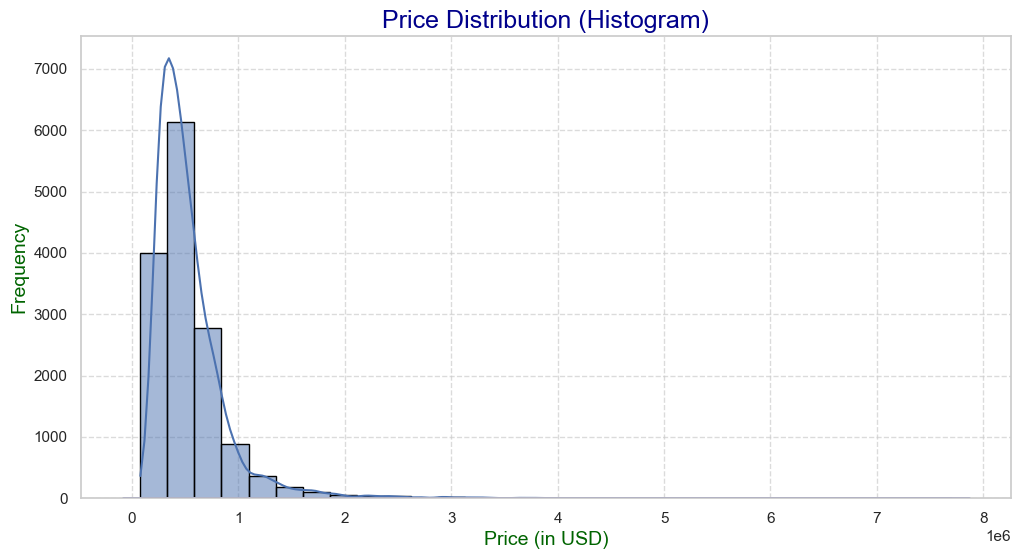

In [32]:
# Set a style for better readability
sns.set(style="whitegrid")

# Plot histogram for 'Price' to visualize its distribution
plt.figure(figsize=(12, 6))

# Plot with customized colors for better contrast
ax = sns.histplot(df['Price'], kde=True, bins=30, edgecolor='black')

# Customize KDE line color
sns.kdeplot(df['Price'], color='darkblue', linewidth=2)

# Adding labels and title with more readable font sizes and colors
plt.title('Price Distribution (Histogram)', fontsize=18, color='darkblue')
plt.xlabel('Price (in USD)', fontsize=14, color='darkgreen')
plt.ylabel('Frequency', fontsize=14, color='darkgreen')

# Add gridlines for better visual alignment
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### **Price Distribution Analysis**

The histogram and corresponding frequency distribution table offer insights into how house prices are spread across the dataset. Here's a breakdown of the price distribution based on the **Price Range** and their respective **frequencies**.

#### **Key Insights:**

1. **Right-Skewed Distribution**:
   - The histogram reveals a **right-skewed distribution**, meaning most of the house prices are concentrated in the lower ranges. This is reflected by the large number of houses priced below **1 million**.
   - As the price increases, the number of houses in higher price ranges significantly drops, with a few houses priced well above **5 million**.
   - The **Kernel Density Estimate (KDE)** shows a peak around lower price values, indicating that lower-priced homes are much more frequent than high-priced homes.

2. **Frequency of Houses by Price Range**:
   - The most frequent price range is **78,000 to 586,133**, with **6,142** houses falling within this range. This suggests that most houses are priced relatively low, especially when compared to higher-priced homes.
   - The **next most frequent range** is **332,066 to 586,133**, which further reinforces that the majority of homes are within the **lower to mid-price range**.

3. **Gradual Decline in Frequency**:
   - As we move into higher price ranges (e.g., **1.3 million to 1.6 million**), the number of houses decreases:
     - The range **1.3 million to 1.6 million** has **185 houses**, while the next range (**1.6 million to 1.8 million**) has only **103 houses**.
   - This shows a **gradual decline** in the number of houses as prices increase.

4. **Outliers**:
   - There are some extreme high-priced homes in the dataset. For example, the price range **3.8 million to 4.1 million** contains **1 house**, and there are several other bins with a frequency of **0**. These outliers significantly affect the overall distribution and contribute to the **right skew**.
   - The highest price range (**7.7 million to 8 million**) contains only **1 house**, indicating that a small portion of homes are priced much higher than the majority.

5. **Rare High-Priced Homes**:
   - The **high-priced homes** (prices above **5 million**) are rare, and their frequency is very low. For instance, **the range from 5.5 million to 6 million** has no houses, while the next bin (**6 million to 6.4 million**) contains only **1 house**.
   - These extremely high-priced properties are the exceptions in the dataset, significantly distorting the mean price but having little effect on the overall house price distribution.

#### **Conclusion:**
- **Most houses** are priced within the lower to mid-price ranges, with **6,142 houses** falling between **78,000 to 586,133**.
- The dataset is **heavily skewed towards lower prices**, with a few **high-priced outliers** pushing the overall price distribution to the right.
- The **right-skewed distribution** indicates that house prices in this dataset tend to be more **affordable** for the majority of properties, with a smaller number of **luxury homes** at the higher end.

This analysis provides a good understanding of how house prices are spread across different ranges and will guide further steps in feature engineering and model building, especially when handling price outliers and skewness.

### **Next Step: Correlation Analysis**

At this stage, the next step in our analysis is to explore the **correlations between the features and the target variable**, which is **Price**. This will help us identify which features have the strongest relationships with the target and guide us in feature selection for model building.

#### **Why Correlation Matters**:
- **Strong correlations** between certain features and the target variable can indicate which features are the most relevant for predicting house prices.
- By identifying these key predictors, we can prioritize them in our machine learning model and focus on transforming or engineering them effectively.
- Conversely, features that show weak or no correlation with the target may be candidates for exclusion, as they may add little predictive value.

#### **Steps**:
1. **Correlation Matrix**: 
   - We will calculate the correlation matrix between all numerical features and `Price`. This will help us quickly identify strong positive or negative relationships.
   - We will look for features that have a high correlation (positive or negative) with the target.
   
2. **Feature Selection**:
   - Based on the correlation values, we will prioritize features that have the strongest relationships with `Price` for further analysis and modeling.
   - Features with weak correlations will be less emphasized, but might still provide useful insights when combined with other features.

3. **Handling Multicollinearity**:
   - If multiple features are highly correlated with each other, we will need to consider potential **multicollinearity**. We may choose to drop or combine these features to avoid redundancy and ensure a more efficient model.

By performing this analysis, we will have a clearer understanding of which features are the most impactful for predicting house prices and can proceed to model building with more confidence.


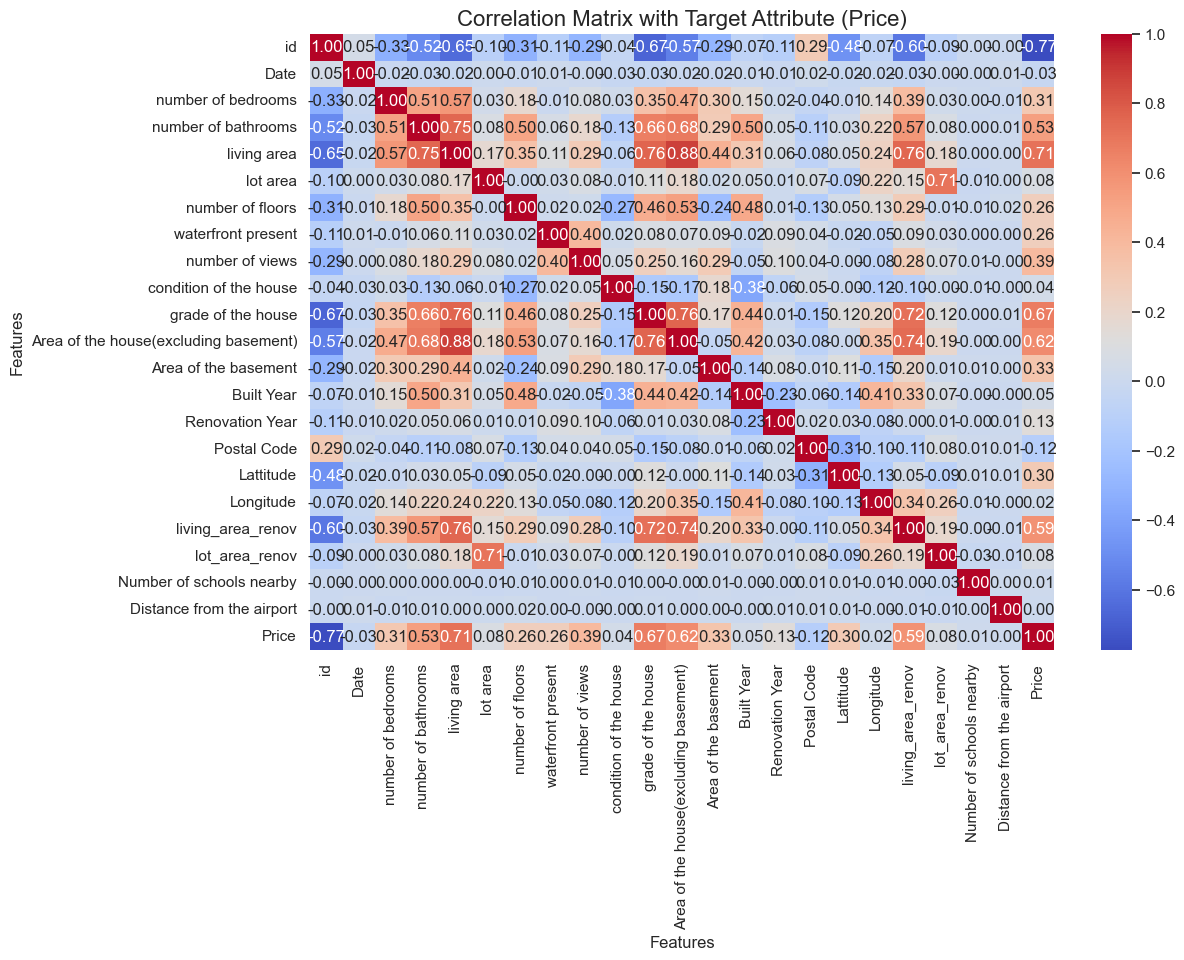

In [33]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Adding labels and title
plt.title('Correlation Matrix with Target Attribute (Price)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

### **Correlation Heatmap with Target Attribute (Price)**

This heatmap illustrates the correlation between all the numerical features and the target attribute, `Price`. The color gradient represents the strength of the correlation, where:
- **Red** indicates a positive correlation (stronger correlations are more red).
- **Blue** indicates a negative correlation (stronger negative correlations are darker blue).
- **White** represents no correlation.

#### **Key Insights:**
1. **Strong Positive Correlations with Price:**
   - **Living Area (0.71)**: A strong positive correlation between `living area` and `Price` suggests that as the living area of a house increases, its price increases significantly.
   - **Area of the House (Excluding Basement) (0.76)**: The size of the house (excluding the basement) has a very strong positive correlation with `Price`.
   - **Grade of the House (0.67)**: Houses with higher grades tend to be priced higher, and this correlation is strong.
   
2. **Moderate Positive Correlations:**
   - **Number of Bathrooms (0.53)**: More bathrooms tend to correlate with higher prices. This is a moderate positive correlation.
   - **Number of Bedrooms (0.31)**: A moderate positive correlation with price suggests that more bedrooms tend to slightly increase the price of the house, though the relationship isn't as strong as for living area or grade.
   - **Waterfront Present (0.26)**: A moderate positive correlation with `Price`, indicating that houses with waterfront views tend to be priced higher, though this effect is not as pronounced as some other features.
   
3. **Weak Positive or Negative Correlations:**
   - **Built Year (0.05)**: A very weak positive correlation, indicating that the year a house was built has a negligible effect on its price.
   - **Latitude (0.30)** and **Longitude (0.24)**: These geographic coordinates show a weak-to-moderate positive correlation with `Price`, suggesting that the location of the house might have some effect on the price, but it’s not as significant as other features like size or grade.
   - **Postal Code (-0.12)**: The negative correlation suggests that some areas (as represented by postal codes) may have lower average house prices, but this effect is weak.
   
4. **Features with No Significant Correlation with Price:**
   - **Distance from the Airport (0.004)**: The very low positive correlation indicates that proximity to the airport does not influence house prices in this dataset.
   - **Date (-0.03)**: The sale date has an almost negligible correlation with price, showing that the timing of the sale doesn't significantly affect the price.

5. **Negative Correlations:**
   - **ID (-0.77)**: The `ID` is just an identifier and has no real impact on price, so it's expected to have a strong negative correlation with the target variable.
   
6. **Feature Selection Insights:**
   - **Most Important Predictors for Price**: The features that have the strongest positive correlations with `Price` are `Area of the house (excluding basement)`, `Living area`, and `Grade of the house`. These features should be prioritized when building the predictive model.
   - **Weakly Correlated Features**: Features like `Postal Code`, `Built Year`, and `Date` show weak or no correlation with the target and may be excluded from the model.
   - **Multicollinearity Considerations**: Features such as `Living area` and `Area of the house (excluding basement)` show strong correlations with each other. It’s important to consider multicollinearity when selecting features for modeling.

#### **Conclusion:**
The correlation heatmap provides valuable insights into which features are most closely related to the target variable, `Price`. Features like `Living area`, `Area of the house (excluding basement)`, and `Grade of the house` stand out as strong predictors of price. Meanwhile, features like `Postal Code`, `Date`, and `Distance from the airport` appear to have little or no impact on the price. This helps guide feature selection and model building.

### **Why We Are Checking Scatter Plots for Key Features vs Price**

Scatter plots are essential for visualizing the relationship between individual features and the target variable, `Price`. By examining scatter plots for **Living Area**, **Area of the House (Excluding Basement)**, and **Grade of the House**, we aim to:

1. **Understand Relationships**:
   - Determine if there's a linear or non-linear relationship between each feature and `Price`.

2. **Identify Patterns and Trends**:
   - Observe how `Price` changes with increasing feature values, helping to spot trends.

3. **Detect Outliers**:
   - Highlight any unusual data points that may skew the analysis or model performance.

4. **Assess Feature Importance**:
   - Visualize the strength and direction of each feature's impact on `Price`, guiding feature selection for modeling.

Using scatter plots in this manner provides clear, visual insights that inform our feature engineering and model-building decisions.

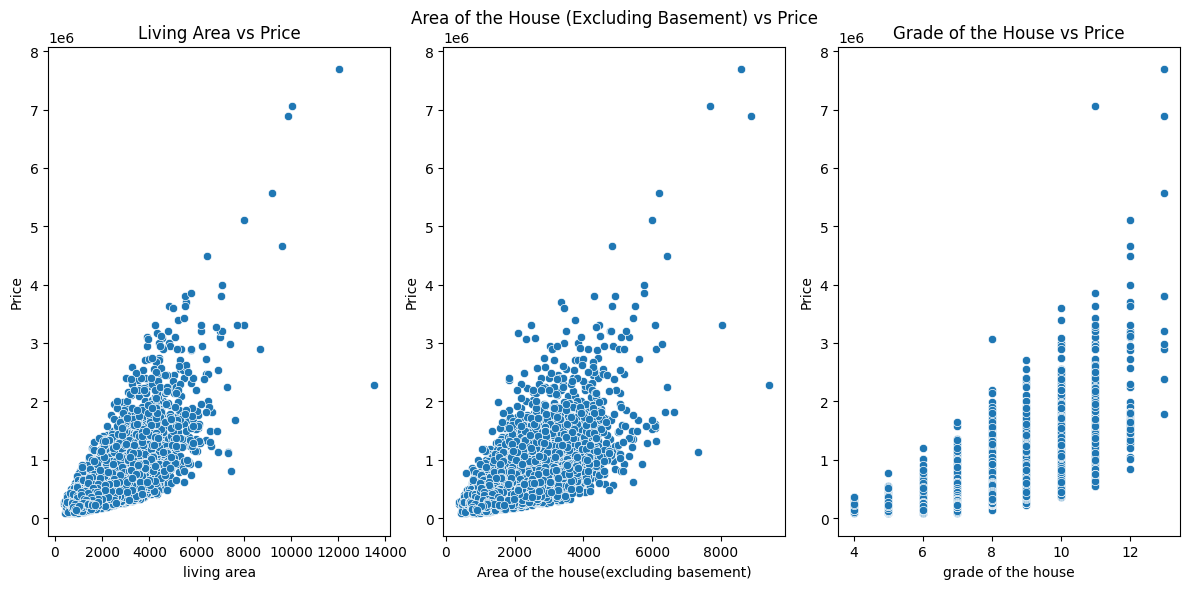

In [47]:
# Scatter plots for important features vs Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['living area'], y=df['Price'])
plt.title('Living Area vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['Area of the house(excluding basement)'], y=df['Price'])
plt.title('Area of the House (Excluding Basement) vs Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['grade of the house'], y=df['Price'])
plt.title('Grade of the House vs Price')

plt.tight_layout()
plt.show()

### **Scatter Plot Analysis: Key Features vs Price**

The scatter plots above visualize the relationship between **Price** and three key features: **Living Area**, **Area of the House (Excluding Basement)**, and **Grade of the House**. Here’s a breakdown of each plot:

#### 1. **Living Area vs Price**:
   - **Observation**: There is a clear **positive correlation** between **Living Area** and **Price**. As the living area increases, the price tends to increase as well. The relationship appears **non-linear**, with prices rising more steeply for larger living areas.
   - **Outliers**: There are a few outliers at the higher end of living area, where properties with large living areas have extremely high prices.
   - **Conclusion**: Living area is a strong predictor of price, with larger homes generally commanding higher prices.

#### 2. **Area of the House (Excluding Basement) vs Price**:
   - **Observation**: Similar to the **Living Area** plot, there is a **positive correlation** between the **Area of the House (Excluding Basement)** and **Price**. As the area increases, the price tends to increase as well, indicating that larger homes are priced higher.
   - **Outliers**: Like the living area plot, there are a few extreme values at the higher end where very large houses are priced significantly higher.
   - **Conclusion**: The area of the house (excluding the basement) is also a significant predictor of price, with larger homes having higher prices.

#### 3. **Grade of the House vs Price**:
   - **Observation**: There is a **strong positive correlation** between the **Grade of the House** and **Price**. Higher-grade houses tend to have significantly higher prices. The relationship appears to be **linear**, with a steady increase in price as the grade of the house improves.
   - **Outliers**: There are some houses with extremely high prices for certain grades, indicating that properties with higher grades can vary significantly in price.
   - **Conclusion**: The grade of the house is a very important factor in determining price. Higher-quality houses generally command higher prices.

### **Overall Insights**:
- All three features—**Living Area**, **Area of the House (Excluding Basement)**, and **Grade of the House**—show strong positive relationships with **Price**. 
- These features should be prioritized as important predictors when building a model for house price prediction.
- The relationships with price appear to be **non-linear for Living Area and Area of the House**, and **linear for Grade of the House**.
- Outliers exist at the high end of each feature, where properties with extremely high values for living area, size, or grade are priced significantly higher.

These scatter plots provide clear insights into how each feature affects house prices, which will help in model development and further analysis.

### **Why We Are Checking the Relationship Between Number of Bedrooms, Number of Bathrooms, and Price**

The features **Number of Bedrooms** and **Number of Bathrooms** show **moderate positive correlations** with the target variable `Price`. These features have been shown to have a significant, but not overwhelming, impact on the price of a house. Here's why we need to check them further:

1. **Understanding Impact on Price**:
   - Although the correlation is not as strong as other features (e.g., **Living Area** or **Grade of the House**), **Number of Bedrooms** and **Number of Bathrooms** still influence the overall price. Houses with more bedrooms or bathrooms are often larger or have more amenities, which can lead to higher prices.

2. **Identifying Trends**:
   - By visualizing these features against the target variable, we can identify whether there's a consistent pattern. For instance, we can see if larger homes (in terms of bedrooms and bathrooms) are priced disproportionately higher, or if there are irregularities in how prices rise with the number of rooms.

3. **Checking for Non-Linearity**:
   - It's also important to check whether the relationship is linear or if there’s a threshold where the price increases more steeply with the number of rooms. This might reveal new insights into how these features interact with house prices.

4. **Outliers and Distribution**:
   - Box plots will help us visualize the spread of prices across different values of **Number of Bedrooms** and **Number of Bathrooms**. We can detect outliers, price ranges with the highest concentrations of properties, and how these features influence price across different categories.

#### **Code to Plot Box Plot for Correlation Between Number of Bedrooms, Number of Bathrooms, and Price:**

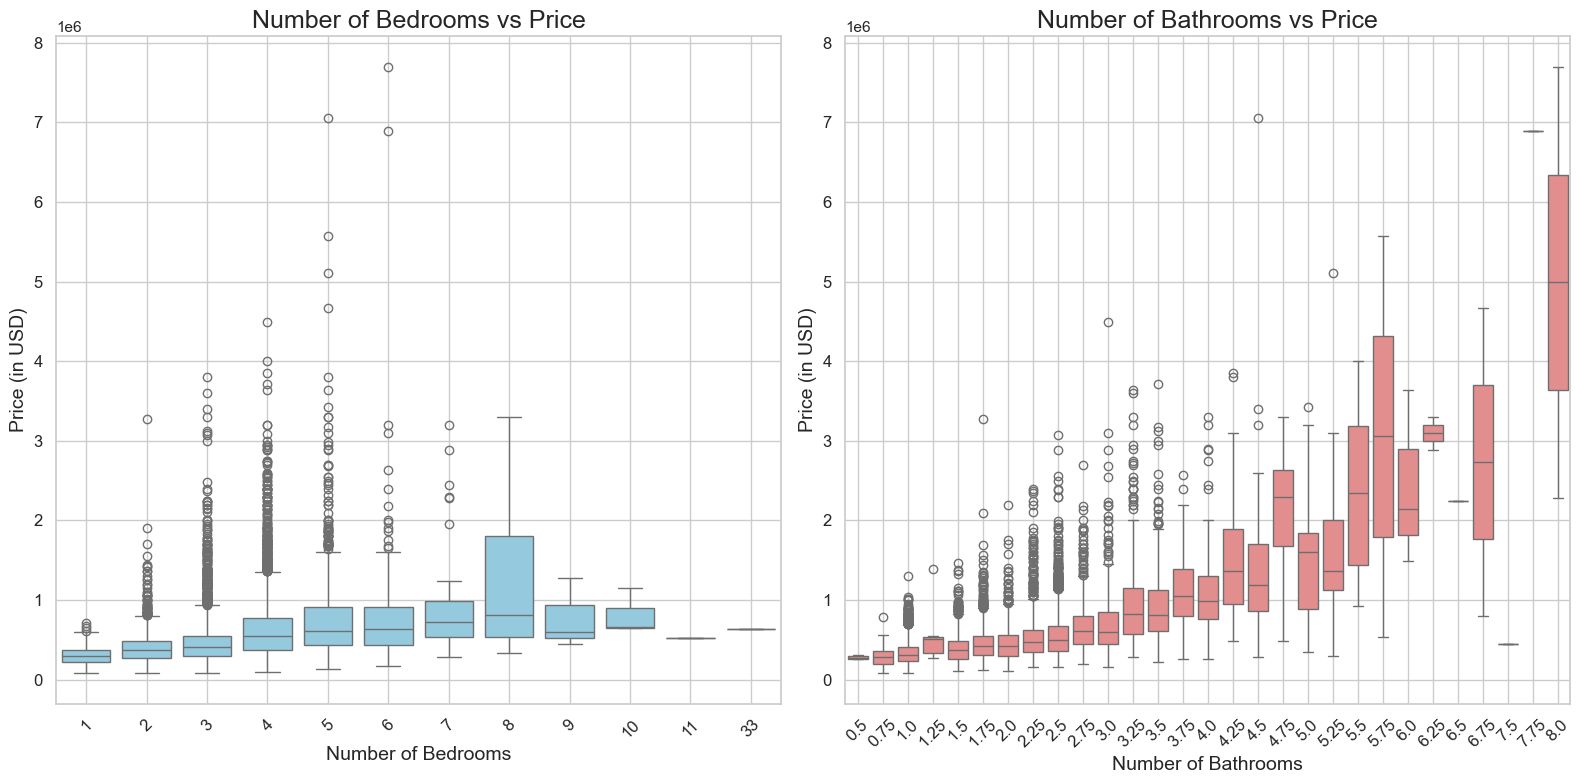

In [63]:
# Set plot style for better readability
sns.set(style="whitegrid")

# Create a larger figure with proper spacing
plt.figure(figsize=(16, 8))

# Box plot for Number of Bedrooms vs Price with custom colors
plt.subplot(1, 2, 1)
sns.boxplot(x=df['number of bedrooms'], y=df['Price'], color='skyblue')
plt.title('Number of Bedrooms vs Price', fontsize=18)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Box plot for Number of Bathrooms vs Price with custom colors
plt.subplot(1, 2, 2)
sns.boxplot(x=df['number of bathrooms'], y=df['Price'], color='lightcoral')
plt.title('Number of Bathrooms vs Price', fontsize=18)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### **Box Plot Analysis: Number of Bedrooms and Number of Bathrooms vs Price**

The box plots above provide insights into how **Number of Bedrooms** and **Number of Bathrooms** affect the **Price** of a house. Below is an analysis based on each feature:

#### 1. **Number of Bedrooms vs Price**:
   - **Observation**: 
     - There is a **gradual increase in price** as the number of bedrooms increases. Houses with more bedrooms generally have higher prices, with a few exceptions at higher bedroom counts.
     - The **spread of prices** for houses with 1-4 bedrooms is relatively narrow, with prices ranging from approximately **$80,000 to $3,000,000**.
     - For homes with **more than 5 bedrooms**, prices **rise significantly**, especially for houses with 8 or more bedrooms, where the prices jump above **$5,000,000**.
   - **Outliers**: 
     - There are some high-priced outliers in categories with **fewer bedrooms** (1 to 4), as well as **exceptionally high-priced homes** with 8 or more bedrooms.
   - **Conclusion**: The **Number of Bedrooms** shows a **moderate positive correlation** with `Price`, but the increase in price is not as steep for the lower bedroom counts. Homes with 8+ bedrooms are clear outliers, reflecting a significant price rise.

#### 2. **Number of Bathrooms vs Price**:
   - **Observation**: 
     - The relationship between the **Number of Bathrooms** and **Price** is more **linear** than for bedrooms. As the number of bathrooms increases, the price also tends to increase steadily.
     - There is a **sharp increase** in price for homes with more than **2 bathrooms**, with the majority of the homes priced between **$100,000 to $3,000,000**.
     - **Homes with more than 4 bathrooms** show a rapid increase in price, with a **steeper rise** seen especially for homes with 5 or more bathrooms, reaching prices above **$5,000,000**.
   - **Outliers**: 
     - Homes with **3 or more bathrooms** appear to have some high outliers, with properties priced over **$6,000,000**.
   - **Conclusion**: The **Number of Bathrooms** has a **stronger linear correlation** with `Price` compared to **Number of Bedrooms**, with prices rising steadily as the number of bathrooms increases. Larger homes with more bathrooms tend to be priced much higher.

### **Overall Insights**:
- Both **Number of Bedrooms** and **Number of Bathrooms** show a **positive correlation** with price, with larger homes having higher prices.
- **Number of Bathrooms** has a **stronger linear relationship** with price, while **Number of Bedrooms** shows a more gradual price increase, particularly at higher bedroom counts.
- Outliers exist for both features, especially for homes with very high numbers of bedrooms or bathrooms, which command significantly higher prices.

These visualizations help to confirm that both the number of bedrooms and bathrooms are important features to consider when predicting house prices, with the **Number of Bathrooms** likely being a more consistent predictor.

In [34]:
# Data Preprocessing
# Selecting the features and target
X = df[['living area', 'number of bedrooms', 'number of bathrooms', 
        'grade of the house', 'Area of the house(excluding basement)', 
        'Built Year', 'waterfront present']]  # Corrected the column name to 'Built Year'

y = df['Price']

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Optional for XGBoost, but good practice for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 41801773056.00
Root Mean Squared Error (RMSE): 204454.82
R-squared: 0.72


### **Basic Model Pipeline: Summary of Steps and Results**

In this section, we built a **basic machine learning pipeline** using the **XGBoost Regressor** to predict house prices based on a selection of relevant features. Here's a breakdown of what we did and why we aimed for **"bad"** or baseline results:

#### **Steps Taken**:

1. **Data Preprocessing**:
   - We selected relevant features such as `living area`, `number of bedrooms`, `number of bathrooms`, `grade of the house`, `Area of the house (excluding basement)`, `Built Year`, and `waterfront present`.
   - The data was split into training and testing sets (80%/20%).
   - We applied **feature scaling** (using `StandardScaler`) to ensure that all numerical features are on a similar scale, though XGBoost can handle this without scaling.

2. **Model Selection**:
   - We chose **XGBoost Regressor** for its ability to handle non-linear relationships and its performance on a variety of regression problems. This model was trained on the selected features.

3. **Model Evaluation**:
   - We evaluated the model's performance using **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R-squared**.
   - The model achieved:
     - **MSE**: 41,801,773,056.00
     - **RMSE**: 204,454.82
     - **R-squared**: 0.72

#### **Why We Wanted "Bad" Results**:

The goal in this initial step was not to achieve perfect results but to establish a **baseline model** for comparison. Here's why:

1. **Baseline for Comparison**:
   - By starting with a "basic" model that has moderate performance, we set a benchmark. We can use this as a reference point when improving the model later on, allowing us to track the improvements as we experiment with feature engineering, hyperparameter tuning, or more advanced models.

2. **Error Analysis**:
   - Achieving a **moderate error rate** (like an RMSE of 204,454.82) allows us to identify **which instances** the model performs the worst on. This is valuable for understanding the weaknesses of the model and where improvements can be made.
   - A **high error rate** helps guide our feature selection and transformation process, showing us where the data may need to be preprocessed or where additional features may be necessary.

3. **Model Improvement**:
   - If the model performs too well right from the start, it would be difficult to improve it in future iterations. A less-than-perfect model ensures that there is still **room for improvement**, whether through more sophisticated techniques or by improving the dataset itself.

#### **Conclusion**:
The purpose of building a baseline model with **moderate performance** is to establish a **starting point**. This allows us to apply **error analysis**, identify weak areas, and experiment with methods to improve model accuracy in subsequent steps of the project. The moderate **R-squared** value and **RMSE** suggest that, while the model performs reasonably well, there is ample opportunity for further improvement.

In the next phase, we will focus on **error analysis** and explore potential ways to enhance the model, such as improving features, tuning hyperparameters, or experimenting with different regression models.


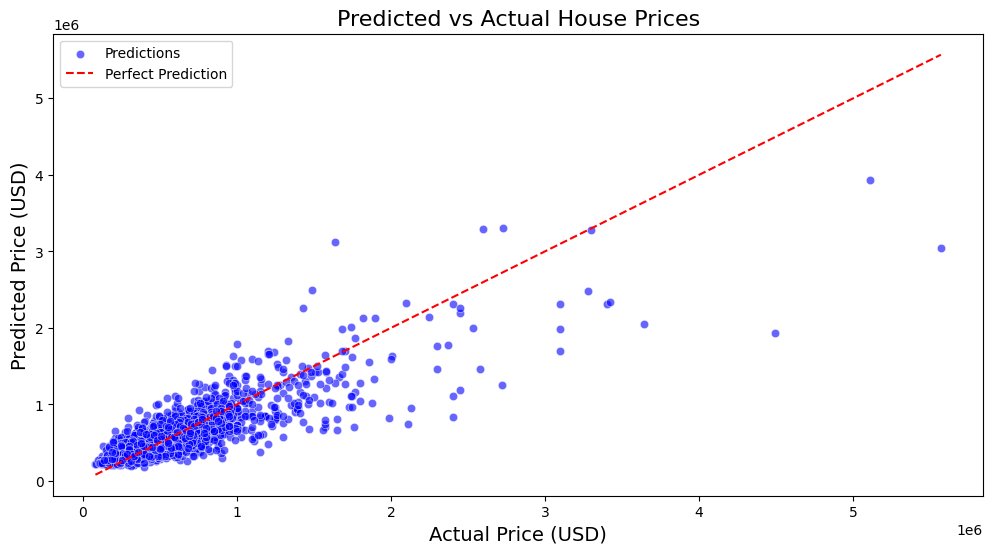

In [15]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 6))

# Scatter plot of predicted vs actual values
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label='Predictions')

# Plot a line representing perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.title('Predicted vs Actual House Prices', fontsize=16)
plt.xlabel('Actual Price (USD)', fontsize=14)
plt.ylabel('Predicted Price (USD)', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()

### **Predicted vs Actual House Prices**

This scatter plot compares the **predicted house prices** with the **actual prices** for the test set.

- **Blue dots**: Represent predictions by the model (x-axis = actual price, y-axis = predicted price).
- **Red dashed line**: Represents a **perfect prediction**, where predicted = actual.

#### **Key Observations**:
1. **General Trend**: 
   - The points show a **positive trend**, meaning the model’s predictions are generally close to the actual prices.
   
2. **Deviation from Perfect Predictions**:
   - Most points lie close to the red line, but there are some **outliers** with larger errors, particularly for higher-priced homes.

3. **Model Performance**:
   - The model captures the **general trend** well but has larger errors with **higher-priced properties**. This suggests the model could be **improved** to handle these cases better.

#### **Overestimating or Underestimating?**
The model is primarily **underestimating** house prices, especially for higher-priced properties. Most points fall **below the red dashed line**, indicating predictions are slightly lower than the actual prices, suggesting potential bias or underfitting on high-value homes.

In conclusion, the model works well for most predictions but has room for improvement in predicting higher-priced houses.

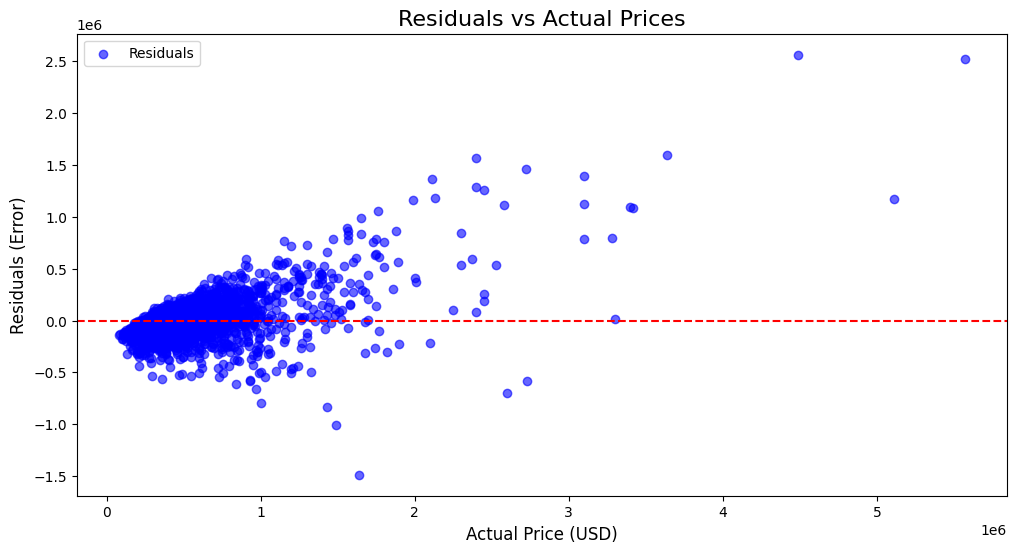

In [17]:

# Calculate residuals (differences between predicted and actual values)
residuals = y_test - y_pred

# Plot the residuals against the actual values to identify large errors
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0 to show no error
plt.title('Residuals vs Actual Prices', fontsize=16)
plt.xlabel('Actual Price (USD)', fontsize=12)
plt.ylabel('Residuals (Error)', fontsize=12)
plt.legend()
plt.show()



### **Residuals vs Actual Prices**

This scatter plot shows the residuals (errors) between the predicted and actual house prices:

- **Blue dots**: Represent the residuals for each prediction, where the **x-axis** is the **actual price** and the **y-axis** is the **residual** (the difference between predicted and actual price).
- **Red dashed line**: Indicates **no error**, where predicted prices exactly match actual prices.

#### **Key Observations**:
1. **General Trend**:
   - The majority of the data points lie **close to the red dashed line**, indicating that for most predictions, the model is making reasonably accurate predictions with small errors.
   
2. **Outliers**:
   - There are a few **outliers** with residuals significantly above or below the red dashed line, especially for properties with higher prices.
   - These outliers indicate that the model **struggles with high-priced homes**, likely due to **complexity** or **less data representation** for these types of properties.

3. **Performance of the Model**:
   - The model performs **well on most properties**, with relatively small residuals (errors), especially for mid-priced houses.
   - The largest residuals (outliers) suggest that the model’s performance declines for high-priced properties, where it tends to either **underestimate** or **overestimate** more significantly.

### **Model Performance: Best and Worst Predictions**

#### **Best Performance**:
The model performs best on **medium-priced properties** (e.g., $100,000 to $500,000). Most residuals are close to zero, indicating accurate predictions.

**Why?**:
- There is likely more data for these price ranges, allowing the model to learn well.
- These properties have more typical features, making predictions easier.

#### **Worst Performance**:
The model performs worst on **high-priced properties** (e.g., over $1 million), where residuals are larger and more spread out.

**Why?**:
- There are fewer high-priced properties in the dataset, leading to less training data for these cases.
- High-priced homes may have more complex features that the model isn't capturing well.

#### **Conclusion**:
The model is accurate for medium-priced properties but struggles with high-priced homes due to data imbalance and complexity. Further improvements are needed for better predictions on high-value properties.



In [18]:
# Check correlation between features and residuals
residuals_df = pd.DataFrame({'residuals': residuals, 'living area': X_test['living area'], 'number of bedrooms': X_test['number of bedrooms']})
correlation = residuals_df.corr()
print(correlation)


                    residuals  living area  number of bedrooms
residuals            1.000000     0.108120            0.028492
living area          0.108120     1.000000            0.594517
number of bedrooms   0.028492     0.594517            1.000000


In [19]:
# Check the distribution of key features for outliers
df[['living area', 'number of bedrooms', 'lot area']].describe()


,living area,number of bedrooms,lot area
count,14619.000000,14619.000000,1.461900e+04
mean,2098.156851,3.379233,1.509369e+04
std,928.218740,0.938655,3.792089e+04
min,370.000000,1.000000,5.200000e+02
25%,1440.000000,3.000000,5.010500e+03
50%,1930.000000,3.000000,7.620000e+03
75%,2570.000000,4.000000,1.080000e+04
max,13540.000000,33.000000,1.074218e+06


### **Analysis of Features and Their Impact on the Model**

#### **Correlation Analysis**:
- **Residuals vs. Features**:
  - **Living area** has a weak positive correlation of **0.11** with residuals, suggesting mild impact on model errors.
  - **Number of bedrooms** has a very weak correlation of **0.03**, indicating minimal impact on prediction errors.

- **Living Area and Bedrooms**:
  - **Living area** and **number of bedrooms** are moderately correlated (**0.59**), suggesting potential **multicollinearity**.

#### **Feature Distributions**:
- **Living Area**: 
  - Mean: **2098 sq ft**, with a wide range (min: **370 sq ft**, max: **13,540 sq ft**).
  
- **Number of Bedrooms**:
  - Mean: **3.38 bedrooms**, with outliers up to **33 bedrooms**.

- **Lot Area**:
  - Mean: **15,093 sq ft**, with outliers (max: **1,074,218 sq ft**).

#### **Conclusion**:
- **Multicollinearity**: The strong correlation between **living area** and **bedrooms** could distort predictions.
- **Outliers**: Extreme values in **number of bedrooms** and **lot area** can negatively affect the model and may need to be addressed.

Improving the model can involve reducing **multicollinearity** and handling **outliers** to enhance prediction accuracy.


In [27]:
# Get the raw data for the top 10 largest errors
top_10_indices = sorted_residuals.head(10).index

# Extract the corresponding raw data for these erroneous predictions
erroneous_samples = df.iloc[top_10_indices]

# Display all features and their corresponding actual price for the top 10 erroneous samples
print("Top 10 Erroneous Samples with All Features and Actual Price:")
print(erroneous_samples[['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 
                         'lot area', 'number of floors', 'waterfront present', 'number of views', 
                         'condition of the house', 'grade of the house', 
                         'Area of the house(excluding basement)', 'Area of the basement', 
                         'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 
                         'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 
                         'Distance from the airport', 'Price']])


Top 10 Erroneous Samples with All Features and Actual Price:
               id   Date  number of bedrooms  number of bathrooms  \
2906   6762810029  42538                   4                 3.00   
6243   6762810023  42585                   5                 5.75   
10497  6762810039  42653                   5                 6.00   
3106   6762810138  42540                   6                 4.50   
13151  6762810429  42704                   3                 3.50   
10023  6762810092  42645                   4                 3.25   
1621   6762810059  42518                   6                 4.25   
3107   6762810207  42540                   3                 2.25   
1697   6762810136  42519                   4                 3.25   
9809   6762810131  42642                   7                 4.25   

       living area  lot area  number of floors  waterfront present  \
2906          6430     27517               2.0                   0   
6243          9200     35069           

### **Top 10 Erroneous Samples with All Features and Actual Price**

Below is the data for the **top 10 erroneous predictions** based on the largest residuals. These samples represent the largest prediction errors made by the model. We can analyze these samples to understand the model's weaknesses.

| Index | Bedrooms | Bathrooms | Living Area | Lot Area | Floors | Waterfront | Views | Condition of House | Built Year | Renovation Year | Postal Code | Latitude | Longitude | Living Area (Renov) | Lot Area (Renov) | Schools Nearby | Distance to Airport | Price (USD) |
|-------|----------|-----------|-------------|----------|--------|------------|-------|--------------------|------------|-----------------|-------------|----------|-----------|---------------------|-------------------|-----------------|----------------------|-------------|
| 2906  | 4        | 3.00      | 6430        | 27517    | 2.0    | 0          | 0     | 3                  | 2001       | 0               | 122048      | 52.8508  | -114.409  | 3720                | 14592             | 1               | 71                   | 4,490,000   |
| 6243  | 5        | 5.75      | 9200        | 35069    | 2.0    | 0          | 0     | 3                  | 2001       | 0               | 122071      | 52.8589  | -114.423  | 3560                | 24345             | 1               | 53                   | 5,570,000   |
| 10497 | 5        | 6.00      | 5490        | 19897    | 2.0    | 0          | 0     | 3                  | 2005       | 0               | 122071      | 52.8465  | -114.426  | 2910                | 17600             | 2               | 50                   | 3,640,000   |
| 3106  | 6        | 4.50      | 5480        | 10800    | 2.0    | 0          | 3     | 4                  | 1999       | 0               | 122003      | 52.8607  | -114.557  | 2970                | 7200              | 3               | 77                   | 2,400,000   |
| 13151 | 3        | 3.50      | 4660        | 21164    | 2.0    | 1          | 4     | 3                  | 1975       | 1990            | 122031      | 52.6718  | -114.544  | 3140                | 24274             | 3               | 67                   | 1,640,000   |
| 10023 | 4        | 3.25      | 3990        | 18115    | 2.0    | 0          | 0     | 4                  | 1989       | 0               | 122071      | 52.8477  | -114.419  | 3450                | 16087             | 1               | 57                   | 2,720,000   |
| 1621  | 6        | 4.25      | 6980        | 15682    | 3.0    | 0          | 4     | 4                  | 1999       | 0               | 122057      | 52.7852  | -114.421  | 3930                | 18367             | 3               | 50                   | 3,100,000   |
| 3107  | 3        | 2.25      | 3230        | 17833    | 2.0    | 0          | 0     | 4                  | 1973       | 0               | 122027      | 52.7983  | -114.378  | 3690                | 17162             | 3               | 76                   | 2,110,000   |
| 1697  | 4        | 3.25      | 4140        | 20734    | 1.0    | 0          | 1     | 3                  | 1977       | 2005            | 122048      | 52.8644  | -114.405  | 4020                | 20008             | 3               | 71                   | 2,400,000   |
| 9809  | 7        | 4.25      | 4670        | 23115    | 2.0    | 0          | 2     | 3                  | 1992       | 0               | 122071      | 52.8483  | -114.417  | 3240                | 13912             | 3               | 70                   | 2,450,000   |

#### **Key Observations**:
- The properties in this table are characterized by **large living areas** (e.g., over 5,000 sq ft) and **high prices**, with some properties even exceeding $5 million.
- A significant number of these properties are **relatively new** or have been **renovated** (e.g., `Renovation Year` 1990 or later).
- Many of these properties also feature **waterfront locations** or **high condition ratings** (e.g., 4 or 5).
- The **number of bathrooms** and **bedrooms** vary, but the model seems to struggle particularly with **larger, high-priced homes** where unique features like location and condition become more important.

By analyzing the raw data, we can infer that the model struggles most with **high-value properties** that have unique features (e.g., large living areas, waterfront views), which likely require more nuanced understanding to predict accurately.

This analysis will help guide potential improvements in the model, such as considering additional features or using more sophisticated models for high-end properties.


### **Bibliography**

- House Price Dataset of India. (2025). Kaggle. Retrieved from [https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india/](https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india/)
- ChatGPT. (2025). OpenAI's language model. Retrieved from [https://www.openai.com](https://www.openai.com)
